# Código para a segmentação de dados de um dataframe

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv

series = read_csv('run8.csv', header=46, usecols = [0,1], index_col = 0)
series.head()

,Avanti Sensor 1: EMG 1 [V]
X [s],
0.000,-0.000062
0.001,-0.000059
0.002,-0.000063
0.003,-0.000059
0.004,-0.000061


In [2]:
series.index = pd.to_datetime(series.index, unit = 's', origin= 'unix')
series.index = series.index.map(lambda t: t.replace(year=2021, month=10, day=12, hour=10))
series.index


DatetimeIndex([       '2021-10-12 10:00:00', '2021-10-12 10:00:00.001000',
               '2021-10-12 10:00:00.002000', '2021-10-12 10:00:00.003000',
               '2021-10-12 10:00:00.004000', '2021-10-12 10:00:00.005000',
               '2021-10-12 10:00:00.006000', '2021-10-12 10:00:00.007000',
               '2021-10-12 10:00:00.008000', '2021-10-12 10:00:00.009000',
               ...
               '2021-10-12 10:00:21.590000', '2021-10-12 10:00:21.591000',
               '2021-10-12 10:00:21.592000', '2021-10-12 10:00:21.593000',
               '2021-10-12 10:00:21.594000', '2021-10-12 10:00:21.595000',
               '2021-10-12 10:00:21.596000', '2021-10-12 10:00:21.597000',
               '2021-10-12 10:00:21.598000', '2021-10-12 10:00:21.599000'],
              dtype='datetime64[ns]', name='X [s]', length=21600, freq=None)

In [3]:
# series.index = pd.DatetimeIndex(series.index, freq=series.index.inferred_freq) 
series.index = pd.DatetimeIndex(series.index).to_period('L')
series.index

PeriodIndex(['2021-10-12 10:00:00.000', '2021-10-12 10:00:00.001',
             '2021-10-12 10:00:00.002', '2021-10-12 10:00:00.003',
             '2021-10-12 10:00:00.004', '2021-10-12 10:00:00.005',
             '2021-10-12 10:00:00.006', '2021-10-12 10:00:00.007',
             '2021-10-12 10:00:00.008', '2021-10-12 10:00:00.009',
             ...
             '2021-10-12 10:00:21.590', '2021-10-12 10:00:21.591',
             '2021-10-12 10:00:21.592', '2021-10-12 10:00:21.593',
             '2021-10-12 10:00:21.594', '2021-10-12 10:00:21.595',
             '2021-10-12 10:00:21.596', '2021-10-12 10:00:21.597',
             '2021-10-12 10:00:21.598', '2021-10-12 10:00:21.599'],
            dtype='period[L]', name='X [s]', length=21600, freq='L')

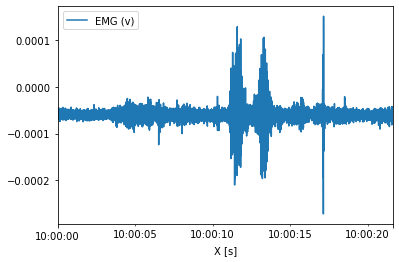

In [4]:
%matplotlib inline
from matplotlib import pyplot
series.plot()
pyplot.legend(['EMG (v)'])

In [5]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%